# SOR Method

    Use Jacobi method to solve a system of linear equations Ax=b with an initial guess x0 = [0, 0]
    Decompose matrix A into A = L + D + U
    Find the steps required to converge to the solution.
    Plot the error vs step



In [1]:
import numpy as np
from numpy.linalg import inv, norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sor(A,b,tol,w):
    D = np.diag(np.diag(A))
    L = (np.tril(A)-D)
    U = (np.triu(A)-D)
    err = 1
    errs = list()
    step = 0
    x_old = np.zeros((len(b),1))
    while err > 10**-6:
        x = inv(w*L + D).dot((1-w)*D.dot(x_old)-w*U.dot(x_old)) + w*inv(D+w*L).dot(b)
        err = norm(b-A.dot(x), 2)
        errs.append(err)
        x_old = x
        step += 1
    
    return [x,step,errs]

# Example 1

In [3]:
A1 = np.array([[3,1,-1],[2,4,1],[-1,2,5]])
b1 = np.array([[4],[1],[1]])
print("A = ")
print(A1)
print("b = ")
print(b1)

A = 
[[ 3  1 -1]
 [ 2  4  1]
 [-1  2  5]]
b = 
[[4]
 [1]
 [1]]


In [4]:
tol = 10**-6
w = 1.13
[x, step, err] = sor(A1,b1,tol,w)
print("The solution is: ")
print(x)
print("The number of steps required to converge are: ")
print(step)

The solution is: 
[[ 1.99999983]
 [-0.9999999 ]
 [ 0.99999995]]
The number of steps required to converge are: 
11


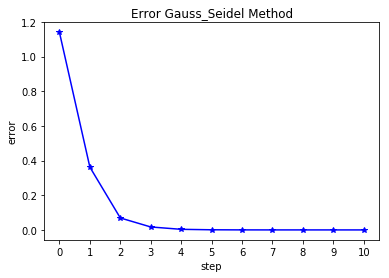

In [5]:
%matplotlib inline
plt.plot(err,'b*-')
plt.title("Error Gauss_Seidel Method")
plt.xticks(np.arange(0,len(err)))
plt.xlabel("step")
plt.ylabel("error")

# Example 2

In [14]:
w = np.linspace(1,1.25,101)

In [15]:
n = 6
A = np.identity(n)*3

for i in range(0,n-1):
    A[i,i+1] = -1
    A[i+1,i] = -1
print("A = ")
print(A)

b = np.array([[5/2],[3/2],[1],[1],[3/2],[5/2]])
print("b = ")
print(b)

A = 
[[ 3. -1.  0.  0.  0.  0.]
 [-1.  3. -1.  0.  0.  0.]
 [ 0. -1.  3. -1.  0.  0.]
 [ 0.  0. -1.  3. -1.  0.]
 [ 0.  0.  0. -1.  3. -1.]
 [ 0.  0.  0.  0. -1.  3.]]
b = 
[[ 2.5]
 [ 1.5]
 [ 1. ]
 [ 1. ]
 [ 1.5]
 [ 2.5]]


In [16]:
err_lst = list()
x_lst = list()
step_lst = list()
tol = 10**-6
i = 0
for wi in w:
    [x, step, err] = sor(A,b,tol,wi)
    err_lst.append(err[6])
    

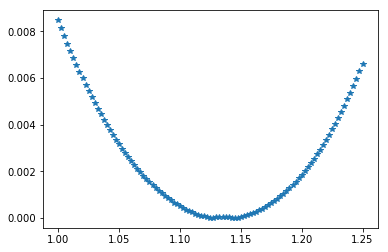

In [17]:
plt.plot(w,err_lst,'*')